## Theoretical Framework

In this project, we aim to develop a **Composite Happiness Index** for cities. The index is designed to measure the overall happiness and well-being of a city’s population based on several factors:

- **Happiness Score**: A direct measure of overall happiness in the city.
- **Air Quality Index**: A measure of the city's air quality and pollution.
- **Green Space Area**: The amount of green space in the city, which impacts health and well-being.
- **Cost of Living**: A measure of how expensive it is to live in the city.
- **Healthcare Index**: A measure of the quality of healthcare in the city.
- **Traffic Density**: How congested the city is, which affects both quality of life and health.
- **Noise Level (Decibel Level)**: How much noise pollution the city has.

Each of these factors will be weighted and combined into a single index to provide a comprehensive view of a city's overall happiness and quality of life.


In [3]:
!pip install pandas numpy matplotlib


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
import pandas as pd

# Load the data
file_path = 'C:/Users/SEJAL/DAV/Project/test.csv'

df = pd.read_csv(file_path)

# Display the first few rows of the data
df.head()


,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
0,Auckland,January,2030,55,Low,80,40,8.4,110,97
1,Berlin,January,2030,50,Low,60,45,7.9,80,93
2,Cairo,January,2030,75,Very High,15,110,4.1,55,69
3,Denver,January,2030,60,Medium,40,50,7.5,95,89
4,Edinburgh,January,2030,55,Low,65,55,7.8,85,92


In [10]:
df.isnull().sum()


City                    0
Month                   0
Year                    0
Decibel_Level           0
Traffic_Density         0
Green_Space_Area        0
Air_Quality_Index       0
Happiness_Score         0
Cost_of_Living_Index    0
Healthcare_Index        0
dtype: int64

In [11]:
df.dtypes


City                     object
Month                    object
Year                      int64
Decibel_Level             int64
Traffic_Density          object
Green_Space_Area          int64
Air_Quality_Index         int64
Happiness_Score         float64
Cost_of_Living_Index      int64
Healthcare_Index          int64
dtype: object

In [12]:
df.describe()


,Year,Decibel_Level,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
count,51.0,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,2030.0,63.333333,46.666667,66.666667,6.919608,83.823529,83.705882
std,0.0,8.103497,20.116328,41.432676,1.265546,24.074639,12.954218
min,2030.0,50.000000,10.000000,25.000000,3.900000,35.000000,43.000000
25%,2030.0,57.500000,32.500000,40.000000,6.350000,65.000000,74.500000
50%,2030.0,60.000000,45.000000,55.000000,7.300000,85.000000,88.000000
75%,2030.0,70.000000,62.500000,77.500000,7.850000,102.500000,93.500000
max,2030.0,85.000000,80.000000,220.000000,8.700000,130.000000,104.000000


In [14]:
# Fill missing values in numeric columns with the mean
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Convert Traffic_Density to numeric (Low = 1, Medium = 2, High = 3)
df['Traffic_Density'] = df['Traffic_Density'].map({'Low': 1, 'Medium': 2, 'High': 3})

# Check the cleaned data
df.head()


,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
0,Auckland,January,2030,55,1.0,80,40,8.4,110,97
1,Berlin,January,2030,50,1.0,60,45,7.9,80,93
2,Cairo,January,2030,75,NaN,15,110,4.1,55,69
3,Denver,January,2030,60,2.0,40,50,7.5,95,89
4,Edinburgh,January,2030,55,1.0,65,55,7.8,85,92


In [15]:
# Check for missing values after filling
print(df.isnull().sum())

# Check the data types to ensure the conversion of Traffic_Density
print(df.dtypes)



City                    0
Month                   0
Year                    0
Decibel_Level           0
Traffic_Density         4
Green_Space_Area        0
Air_Quality_Index       0
Happiness_Score         0
Cost_of_Living_Index    0
Healthcare_Index        0
dtype: int64
City                     object
Month                    object
Year                      int64
Decibel_Level             int64
Traffic_Density         float64
Green_Space_Area          int64
Air_Quality_Index         int64
Happiness_Score         float64
Cost_of_Living_Index      int64
Healthcare_Index          int64
dtype: object


In [16]:
# Impute missing values in 'Traffic_Density' with the mode (most frequent value)
df['Traffic_Density'] = df['Traffic_Density'].fillna(df['Traffic_Density'].mode()[0])

# Check if missing values are handled
df['Traffic_Density'].isnull().sum()


np.int64(0)

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# List of columns to normalize
columns_to_normalize = ['Happiness_Score', 'Air_Quality_Index', 'Green_Space_Area', 
                        'Cost_of_Living_Index', 'Healthcare_Index', 'Traffic_Density', 
                        'Decibel_Level']

# Normalize the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Check the normalized data
df.head()


,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
0,Auckland,January,2030,0.142857,0.0,1.000000,0.076923,0.937500,0.789474,0.885246
1,Berlin,January,2030,0.000000,0.0,0.714286,0.102564,0.833333,0.473684,0.819672
2,Cairo,January,2030,0.714286,0.0,0.071429,0.435897,0.041667,0.210526,0.426230
3,Denver,January,2030,0.285714,0.5,0.428571,0.128205,0.750000,0.631579,0.754098
4,Edinburgh,January,2030,0.142857,0.0,0.785714,0.153846,0.812500,0.526316,0.803279


In [18]:
# Assign weights to each factor
weights = {
    'Happiness_Score': 0.3,
    'Air_Quality_Index': 0.2,
    'Green_Space_Area': 0.2,
    'Cost_of_Living_Index': 0.1,
    'Healthcare_Index': 0.1,
    'Traffic_Density': 0.05,
    'Decibel_Level': 0.05
}

# Compute the composite happiness index
df['Happiness_Index'] = (df['Happiness_Score'] * weights['Happiness_Score'] +
                          df['Air_Quality_Index'] * weights['Air_Quality_Index'] +
                          df['Green_Space_Area'] * weights['Green_Space_Area'] +
                          df['Cost_of_Living_Index'] * weights['Cost_of_Living_Index'] +
                          df['Healthcare_Index'] * weights['Healthcare_Index'] +
                          df['Traffic_Density'] * weights['Traffic_Density'] +
                          df['Decibel_Level'] * weights['Decibel_Level'])

# Display the cities with their computed happiness index
df[['City', 'Happiness_Index']].head()


,City,Happiness_Index
0,Auckland,0.671249
1,Berlin,0.542706
2,Cairo,0.213355
3,Denver,0.514209
4,Edinburgh,0.571764


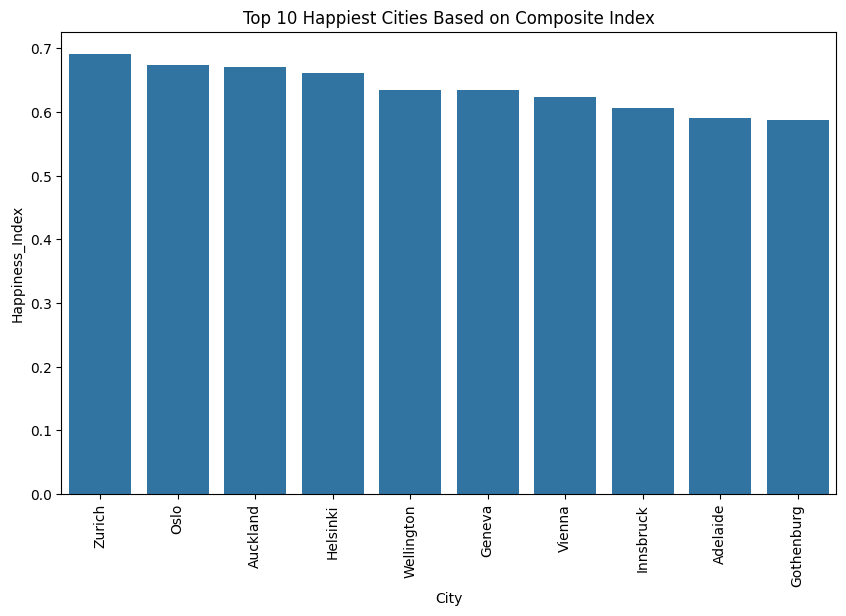

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the cities by Happiness Index in descending order
df_sorted = df.sort_values(by='Happiness_Index', ascending=False)

# Plot the top 10 cities
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Happiness_Index', data=df_sorted.head(10))
plt.xticks(rotation=90)
plt.title('Top 10 Happiest Cities Based on Composite Index')
plt.show()
